<a href="https://colab.research.google.com/github/sakasa/notebooks/blob/master/tokyo_covid19_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pytz import timezone
import numpy as np

%matplotlib inline

### Tokyo COVID19 Data
https://github.com/tokyo-metropolitan-gov/covid19

In [2]:
url = 'https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/data.json'

In [3]:
response = requests.get(url)
response

<Response [200]>

In [4]:
# json文字列をdictへ
j_res = json.loads(response.text)
j_res.keys()

dict_keys(['contacts', 'querents', 'patients', 'patients_summary', 'discharges_summary', 'inspections_summary', 'inspection_persons', 'inspection_status_summary', 'lastUpdate', 'main_summary'])

In [5]:
# データフレームにセット
df = pd.DataFrame(j_res)

In [6]:
# `patients_summary`
df.patients_summary.data[-10:]

[{'小計': 188, '日付': '2020-07-19T08:00:00.000Z'},
 {'小計': 168, '日付': '2020-07-20T08:00:00.000Z'},
 {'小計': 237, '日付': '2020-07-21T08:00:00.000Z'},
 {'小計': 238, '日付': '2020-07-22T08:00:00.000Z'},
 {'小計': 366, '日付': '2020-07-23T08:00:00.000Z'},
 {'小計': 260, '日付': '2020-07-24T08:00:00.000Z'},
 {'小計': 295, '日付': '2020-07-25T08:00:00.000Z'},
 {'小計': 239, '日付': '2020-07-26T08:00:00.000Z'},
 {'小計': 131, '日付': '2020-07-27T08:00:00.000Z'},
 {'小計': 266, '日付': '2020-07-28T08:00:00.000Z'}]

In [7]:
# `patients_summary` の `data` を抽出しデータフレームにセット
sub_df = pd.DataFrame(df.patients_summary.data)
sub_df.tail()

,日付,小計
182,2020-07-24T08:00:00.000Z,260
183,2020-07-25T08:00:00.000Z,295
184,2020-07-26T08:00:00.000Z,239
185,2020-07-27T08:00:00.000Z,131
186,2020-07-28T08:00:00.000Z,266


In [8]:
# 日付型の列を追加
#sub_df['datetime.date'] = [datetime.datetime.fromisoformat(str.replace('Z', '+00:00')).astimezone(timezone('Asia/Tokyo')) for str in sub_df['日付']]
# for ~Python3.6(Google Colab)
sub_df['datetime.date'] = [datetime.datetime.strptime(str.split('.')[0].replace('-', '').replace(':', ''), '%Y%m%dT%H%M%S').astimezone(timezone('Asia/Tokyo')) for str in sub_df['日付']]
sub_df.tail()

,日付,小計,datetime.date
182,2020-07-24T08:00:00.000Z,260,2020-07-24 17:00:00+09:00
183,2020-07-25T08:00:00.000Z,295,2020-07-25 17:00:00+09:00
184,2020-07-26T08:00:00.000Z,239,2020-07-26 17:00:00+09:00
185,2020-07-27T08:00:00.000Z,131,2020-07-27 17:00:00+09:00
186,2020-07-28T08:00:00.000Z,266,2020-07-28 17:00:00+09:00


In [9]:
# 日付が年の何週目かを列にセット `'{yy}w{week nnum}`
sub_df['week_num'] = [f'\'{d.strftime("%y")}w{d.strftime("%V")}' for d in sub_df['datetime.date']]
sub_df.tail()

,日付,小計,datetime.date,week_num
182,2020-07-24T08:00:00.000Z,260,2020-07-24 17:00:00+09:00,'20w30
183,2020-07-25T08:00:00.000Z,295,2020-07-25 17:00:00+09:00,'20w30
184,2020-07-26T08:00:00.000Z,239,2020-07-26 17:00:00+09:00,'20w30
185,2020-07-27T08:00:00.000Z,131,2020-07-27 17:00:00+09:00,'20w31
186,2020-07-28T08:00:00.000Z,266,2020-07-28 17:00:00+09:00,'20w31


In [10]:
# 曜日の列をセット
sub_df['week_day'] = [d.strftime('%a') for d in sub_df['datetime.date']]
sub_df.tail(15)

,日付,小計,datetime.date,week_num,week_day
172,2020-07-14T08:00:00.000Z,143,2020-07-14 17:00:00+09:00,'20w29,Tue
173,2020-07-15T08:00:00.000Z,165,2020-07-15 17:00:00+09:00,'20w29,Wed
174,2020-07-16T08:00:00.000Z,286,2020-07-16 17:00:00+09:00,'20w29,Thu
175,2020-07-17T08:00:00.000Z,293,2020-07-17 17:00:00+09:00,'20w29,Fri
176,2020-07-18T08:00:00.000Z,290,2020-07-18 17:00:00+09:00,'20w29,Sat
177,2020-07-19T08:00:00.000Z,188,2020-07-19 17:00:00+09:00,'20w29,Sun
178,2020-07-20T08:00:00.000Z,168,2020-07-20 17:00:00+09:00,'20w30,Mon
179,2020-07-21T08:00:00.000Z,237,2020-07-21 17:00:00+09:00,'20w30,Tue
180,2020-07-22T08:00:00.000Z,238,2020-07-22 17:00:00+09:00,'20w30,Wed
181,2020-07-23T08:00:00.000Z,366,2020-07-23 17:00:00+09:00,'20w30,Thu


In [11]:
# 週毎に集計
groupby_week_num = sub_df.groupby('week_num')
groupby_week_num

In [12]:
# 集計結果から平均と合計を取得しデータフレームにセット
week_num_df = pd.DataFrame({
    'week_num': sub_df['week_num'].unique(),
    'mean': [m for m in groupby_week_num.agg({'小計': 'mean'})['小計']], 
    'sum': [s for s in groupby_week_num.agg({'小計': 'sum'})['小計']]
})
week_num_df.tail()

,week_num,mean,sum
23,'20w27,93.142857,652
24,'20w28,166.000000,1162
25,'20w29,212.000000,1484
26,'20w30,257.571429,1803
27,'20w31,198.500000,397


### グラフ出力

In [13]:
### 日毎の数
x = sub_df['datetime.date']
y = sub_df['小計']

In [14]:
### 週毎の数
x2 = week_num_df['week_num']
y2_1 = week_num_df['mean']
y2_2 = week_num_df['sum']

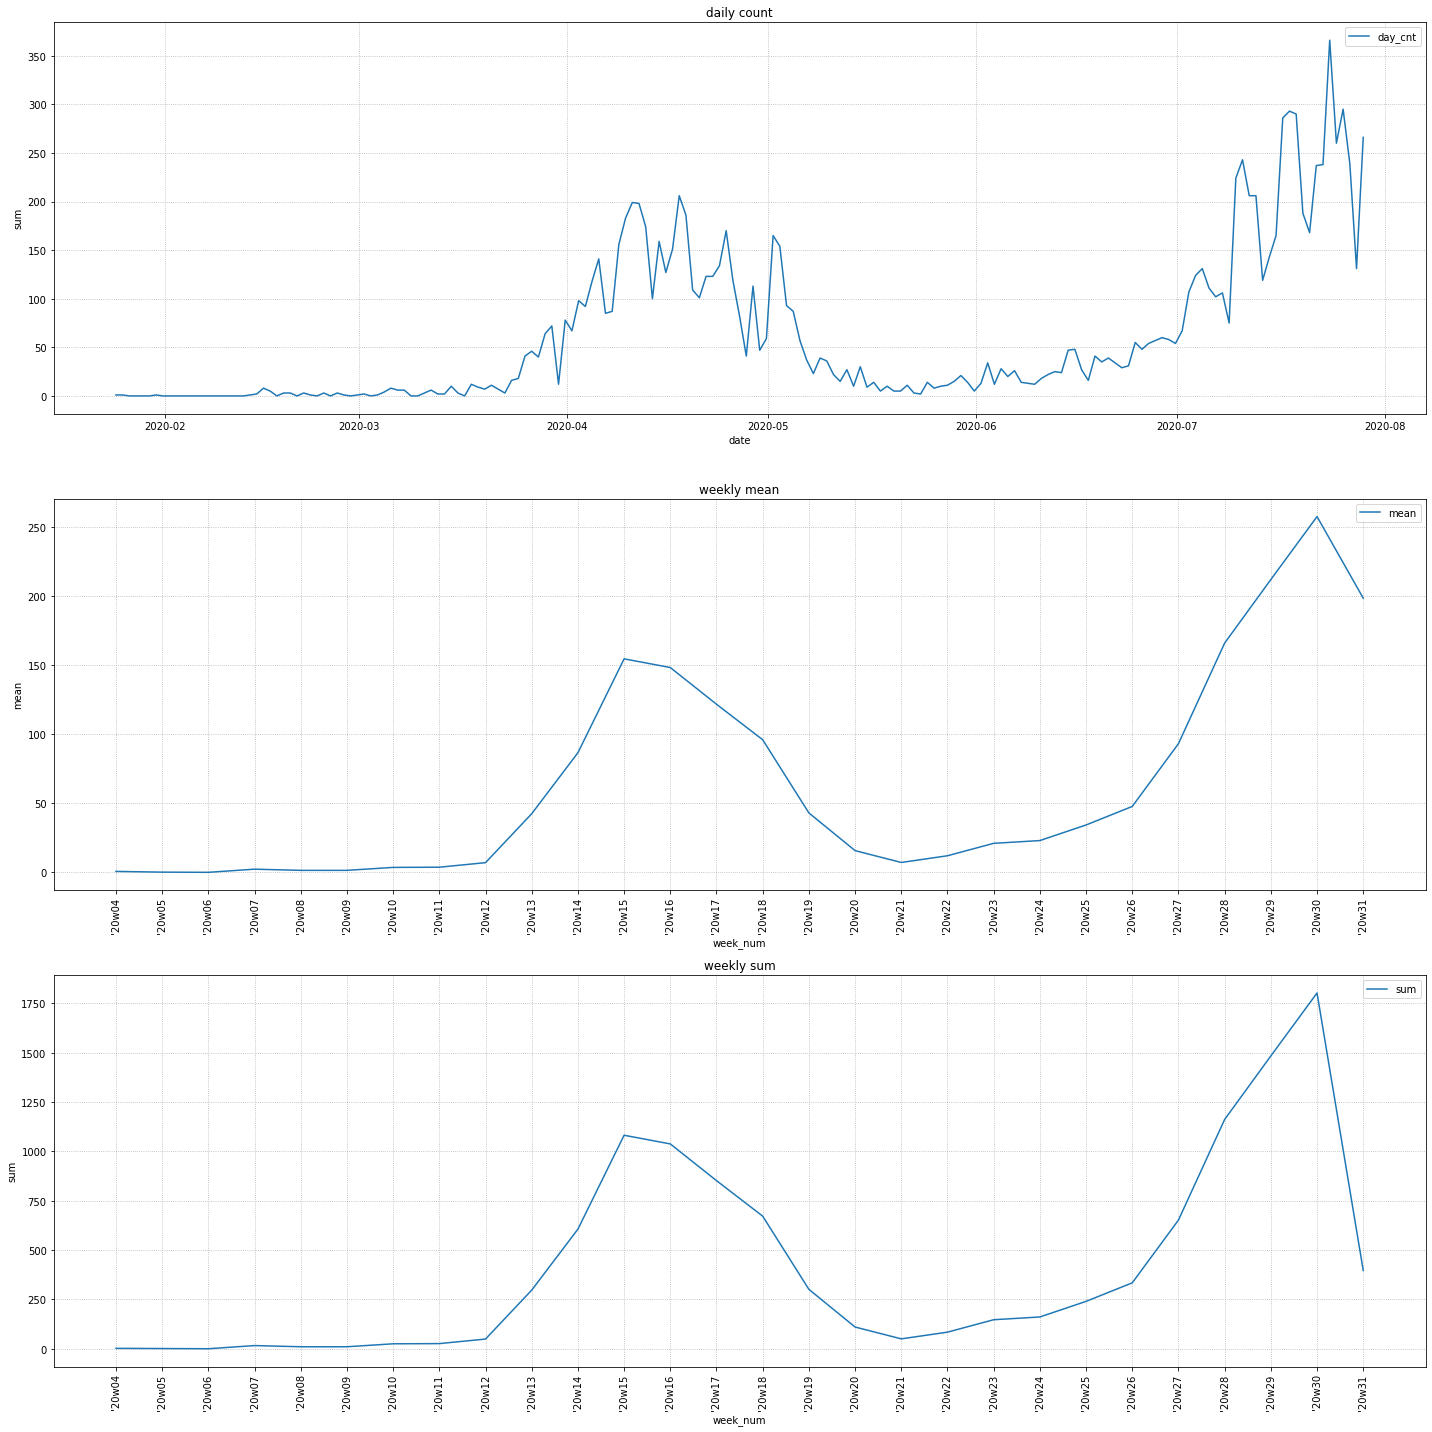

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(20, 20))

### 日毎の数
ax[0].set_title('daily count')
ax[0].set_xlabel('date')
ax[0].set_ylabel('sum')
ax[0].plot(x, y, label='day_cnt')
ax[0].grid(linestyle=':')
ax[0].legend()

### 週毎の平均
ax[1].set_title('weekly mean')
ax[1].set_xticklabels(labels=x2, rotation=90)
ax[1].set_xlabel('week_num')
ax[1].set_ylabel('mean')
ax[1].plot(x2, y2_1, label='mean')
ax[1].grid(linestyle=':')
ax[1].legend()

### 週毎の合計
ax[2].set_title('weekly sum')
ax[2].set_xticklabels(labels=x2, rotation=90)
ax[2].set_xlabel('week_num')
ax[2].set_ylabel('sum')
ax[2].plot(x2, y2_2, label='sum')
ax[2].grid(linestyle=':')
ax[2].legend()

plt.tight_layout()

---

In [16]:
em_start = datetime.datetime(2020, 4, 7)
em_end = datetime.datetime(2020, 5, 25)
em_days = []
for i in range((em_end - em_start).days + 1):
  em_days.append(em_start + datetime.timedelta(i))

In [17]:
year = []
month = []
day = []
for d in sub_df['datetime.date']:
  year.append(int(d.strftime('%Y')))
  month.append(int(d.strftime('%m')))
  day.append(int(d.strftime('%d')))

In [18]:
ds_df = sub_df

# 年
ds_df['year'] = year
# 月
ds_df['month'] = month
# 日
ds_df['day'] = day
# 曜日をダミー変数化
ds_df = pd.concat([ds_df, pd.get_dummies(ds_df['week_day'])], axis=1)
# 経過日数
ds_df['passed'] = [(d - ds_df['datetime.date'][0]).days for d in ds_df['datetime.date']]
# 緊急事態宣言
ds_df['emergency'] = [int(datetime.datetime.strptime(d.strftime('%Y-%m-%d'), '%Y-%m-%d') in em_days) for d in ds_df['datetime.date']]
# 緊急事態宣言経過日数
ds_df['em_passed'] = [((datetime.datetime.strptime(d.strftime('%Y-%m-%d'), '%Y-%m-%d') - em_start).days if em_start < datetime.datetime.strptime(d.strftime('%Y-%m-%d'), '%Y-%m-%d') else 0) for d in ds_df['datetime.date']]
# 検査数

ds_df

,日付,小計,datetime.date,week_num,week_day,year,month,day,Fri,Mon,Sat,Sun,Thu,Tue,Wed,passed,emergency,em_passed
0,2020-01-24T08:00:00.000Z,1,2020-01-24 17:00:00+09:00,'20w04,Fri,2020,1,24,1,0,0,0,0,0,0,0,0,0
1,2020-01-25T08:00:00.000Z,1,2020-01-25 17:00:00+09:00,'20w04,Sat,2020,1,25,0,0,1,0,0,0,0,1,0,0
2,2020-01-26T08:00:00.000Z,0,2020-01-26 17:00:00+09:00,'20w04,Sun,2020,1,26,0,0,0,1,0,0,0,2,0,0
3,2020-01-27T08:00:00.000Z,0,2020-01-27 17:00:00+09:00,'20w05,Mon,2020,1,27,0,1,0,0,0,0,0,3,0,0
4,2020-01-28T08:00:00.000Z,0,2020-01-28 17:00:00+09:00,'20w05,Tue,2020,1,28,0,0,0,0,0,1,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2020-07-24T08:00:00.000Z,260,2020-07-24 17:00:00+09:00,'20w30,Fri,2020,7,24,1,0,0,0,0,0,0,182,0,108
183,2020-07-25T08:00:00.000Z,295,2020-07-25 17:00:00+09:00,'20w30,Sat,2020,7,25,0,0,1,0,0,0,0,183,0,109
184,2020-07-26T08:00:00.000Z,239,2020-07-26 17:00:00+09:00,'20w30,Sun,2020,7,26,0,0,0,1,0,0,0,184,0,110
185,2020-07-27T08:00:00.000Z,131,2020-07-27 17:00:00+09:00,'20w31,Mon,2020,7,27,0,1,0,0,0,0,0,185,0,111


In [19]:
ds_df = ds_df.drop(columns=['日付', '小計', 'datetime.date', 'week_num', 'week_day'])
ds_df = pd.concat([ds_df, sub_df['小計']], axis=1)
ds_df

,year,month,day,Fri,Mon,Sat,Sun,Thu,Tue,Wed,passed,emergency,em_passed,小計
0,2020,1,24,1,0,0,0,0,0,0,0,0,0,1
1,2020,1,25,0,0,1,0,0,0,0,1,0,0,1
2,2020,1,26,0,0,0,1,0,0,0,2,0,0,0
3,2020,1,27,0,1,0,0,0,0,0,3,0,0,0
4,2020,1,28,0,0,0,0,0,1,0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2020,7,24,1,0,0,0,0,0,0,182,0,108,260
183,2020,7,25,0,0,1,0,0,0,0,183,0,109,295
184,2020,7,26,0,0,0,1,0,0,0,184,0,110,239
185,2020,7,27,0,1,0,0,0,0,0,185,0,111,131


In [20]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   year       187 non-null    int64
 1   month      187 non-null    int64
 2   day        187 non-null    int64
 3   Fri        187 non-null    uint8
 4   Mon        187 non-null    uint8
 5   Sat        187 non-null    uint8
 6   Sun        187 non-null    uint8
 7   Thu        187 non-null    uint8
 8   Tue        187 non-null    uint8
 9   Wed        187 non-null    uint8
 10  passed     187 non-null    int64
 11  emergency  187 non-null    int64
 12  em_passed  187 non-null    int64
 13  小計         187 non-null    int64
dtypes: int64(7), uint8(7)
memory usage: 11.6 KB


In [21]:
ds_df.describe()

,year,month,day,Fri,Mon,Sat,Sun,Thu,Tue,Wed,passed,emergency,em_passed,小計
count,187.0,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,2020.0,4.331551,15.951872,0.144385,0.144385,0.144385,0.144385,0.139037,0.144385,0.139037,93.000000,0.262032,33.839572,62.090909
std,0.0,1.798213,8.834977,0.352423,0.352423,0.352423,0.352423,0.346914,0.352423,0.346914,54.126395,0.440921,37.421113,78.847459
min,2020.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.500000,0.000000,0.000000,3.000000
50%,2020.0,4.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93.000000,0.000000,19.000000,25.000000
75%,2020.0,6.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,139.500000,1.000000,65.500000,101.500000
max,2020.0,7.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,186.000000,1.000000,112.000000,366.000000


In [22]:
ds_df.corr()

,year,month,day,Fri,Mon,Sat,Sun,Thu,Tue,Wed,passed,emergency,em_passed,小計
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.125555,-0.016559,0.008892,-0.008075,4.083027e-04,0.003272,0.008892,0.003272,9.868244e-01,0.059360,0.923203,0.556932
day,NaN,-0.125555,1.000000,0.009151,-0.008116,0.002244,-1.209614e-03,0.002195,0.038505,-0.043412,3.642651e-02,-0.017447,0.057234,-0.003274
Fri,NaN,-0.016559,0.009151,1.000000,-0.168750,-0.168750,-1.687500e-01,-0.165080,-0.168750,-0.165080,-1.521974e-02,-0.002590,-0.010464,0.067049
Mon,NaN,0.008892,-0.008116,-0.168750,1.000000,-0.168750,-1.687500e-01,-0.165080,-0.168750,-0.165080,7.609868e-03,-0.002590,0.009104,-0.100117
Sat,NaN,-0.008075,0.002244,-0.168750,-0.168750,1.000000,-1.687500e-01,-0.165080,-0.168750,-0.165080,-7.609868e-03,-0.002590,-0.003942,0.063954
Sun,NaN,0.000408,-0.001210,-0.168750,-0.168750,-0.168750,1.000000e+00,-0.165080,-0.168750,-0.165080,2.002643e-18,-0.002590,0.002581,-0.009181
Thu,NaN,0.003272,0.002195,-0.165080,-0.165080,-0.165080,-1.650804e-01,1.000000,-0.165080,-0.161491,3.722194e-03,0.006579,-0.003242,0.054570
Tue,NaN,0.008892,0.038505,-0.168750,-0.168750,-0.168750,-1.687500e-01,-0.165080,1.000000,-0.165080,1.521974e-02,-0.002590,0.015627,-0.013632
Wed,NaN,0.003272,-0.043412,-0.165080,-0.165080,-0.165080,-1.650804e-01,-0.161491,-0.165080,1.000000,-3.722194e-03,0.006579,-0.009869,-0.062771
